In [120]:
# target variable = predicting the survival of titanic passengers

DATA

In [121]:
import pandas as pd 
import numpy as np
import warnings
warnings.simplefilter("ignore")

In [122]:
df=pd.read_csv("titanic_train.csv")
data=df
df.head(50)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


understanding the columns:

survival - Survival (0 = No; 1 = Yes)
class - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
name - Name
sex - Sex
age - Age
sibsp - Number of Siblings/Spouses Aboard
parch - Number of Parents/Children Aboard
ticket - Ticket Number
fare - Passenger Fare
cabin - Cabin
embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)
boat - Lifeboat (if survived)
body - Body number (if did not survive and body was recovered)


In [123]:
df.shape

(891, 12)

DATA PREPERATION

In [124]:
df=df.rename(columns={'SibSp':'sibling/spouse','Parch':'parent/children'})

In [125]:
df.dtypes

PassengerId          int64
Survived             int64
Pclass               int64
Name                object
Sex                 object
Age                float64
sibling/spouse       int64
parent/children      int64
Ticket              object
Fare               float64
Cabin               object
Embarked            object
dtype: object

In [126]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age',
       'sibling/spouse', 'parent/children', 'Ticket', 'Fare', 'Cabin',
       'Embarked'],
      dtype='object')

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PassengerId      891 non-null    int64  
 1   Survived         891 non-null    int64  
 2   Pclass           891 non-null    int64  
 3   Name             891 non-null    object 
 4   Sex              891 non-null    object 
 5   Age              714 non-null    float64
 6   sibling/spouse   891 non-null    int64  
 7   parent/children  891 non-null    int64  
 8   Ticket           891 non-null    object 
 9   Fare             891 non-null    float64
 10  Cabin            204 non-null    object 
 11  Embarked         889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [128]:
df.isnull().sum()

PassengerId          0
Survived             0
Pclass               0
Name                 0
Sex                  0
Age                177
sibling/spouse       0
parent/children      0
Ticket               0
Fare                 0
Cabin              687
Embarked             2
dtype: int64

from the above data we found Age=177;  Cabin = 687 and Embarked=2 are missing data

In [129]:
df['Age']=df['Age'].fillna((df['Age'].median()))

df['Cabin'].fillna(df['Cabin'].mode().values[0],inplace=True)

In [130]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,sibling/spouse,parent/children,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,False,False,False,False,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False


As missing numericals can be replaced with mean or median and characters with mode,Missing items in Age column is replaced with median and Cabin with mode

EDA

In [131]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [132]:
df.head(50)

,PassengerId,Survived,Pclass,Name,Sex,Age,sibling/spouse,parent/children,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,B96 B98,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,B96 B98,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,B96 B98,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,B96 B98,C


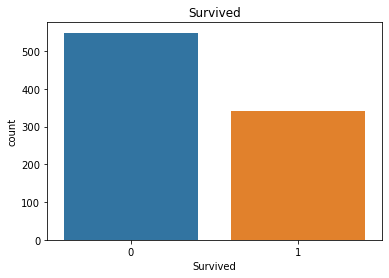

In [133]:
sns.countplot(df["Survived"])
plt.title("Survived")
plt.show()

In [134]:
#we can see number of survival is less

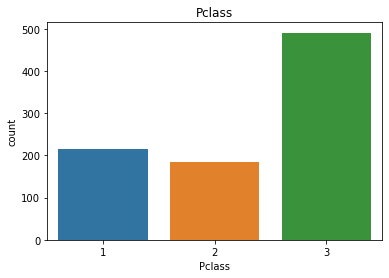

In [135]:
sns.countplot(df["Pclass"])
plt.title("Pclass")
plt.show()

In [136]:
#we can understand class 3 had more number of people upto 500 while class 1=200 and class2=180

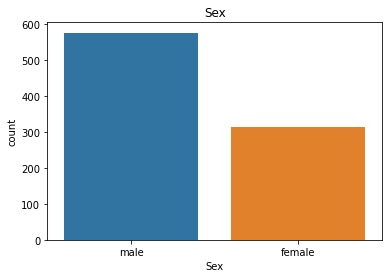

In [137]:
sns.countplot(df["Sex"])
plt.title("Sex")
plt.show()

In [138]:
#male travellors were more than female approximately550 and female travellors were 300


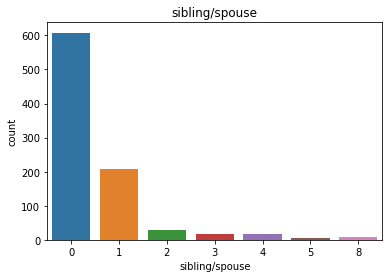

In [139]:
sns.countplot(df["sibling/spouse"])
plt.title("sibling/spouse")
plt.show()

In [140]:
#we can observe no siblings or spouse travelling together was on higher range upto 600,with any 1 of them is 200 and negligible number of counts upto 8

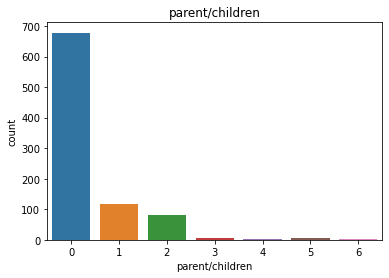

In [141]:
sns.countplot(df["parent/children"])
plt.title("parent/children")
plt.show()

In [142]:
#not travelling with parents or children were 680 and any one of them100 while any 2 of them ranging near 70 and negligable nu,ber upto 6

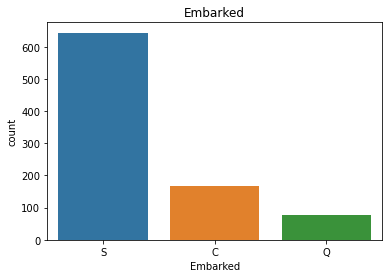

In [143]:
sns.countplot(df["Embarked"])
plt.title("Embarked")
plt.show()

In [144]:
#C=Cherbourg; Q = Queenstown; S = Southampton

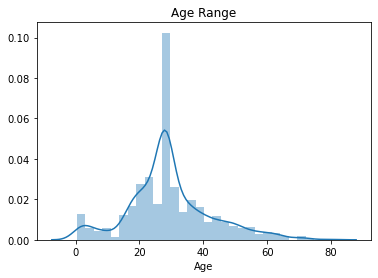

In [145]:
sns.distplot(df["Age"])
plt.title("Age Range")
plt.show()

In [146]:
#as data is not normally distributed we can observe 20-40 were more in number

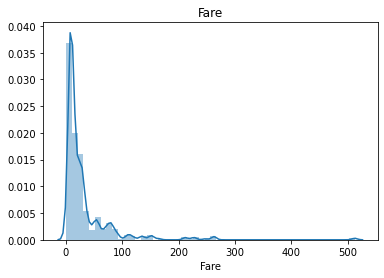

In [147]:
sns.distplot(df["Fare"])
plt.title("Fare")
plt.show()

In [148]:
#passengers fare are not normally distributed

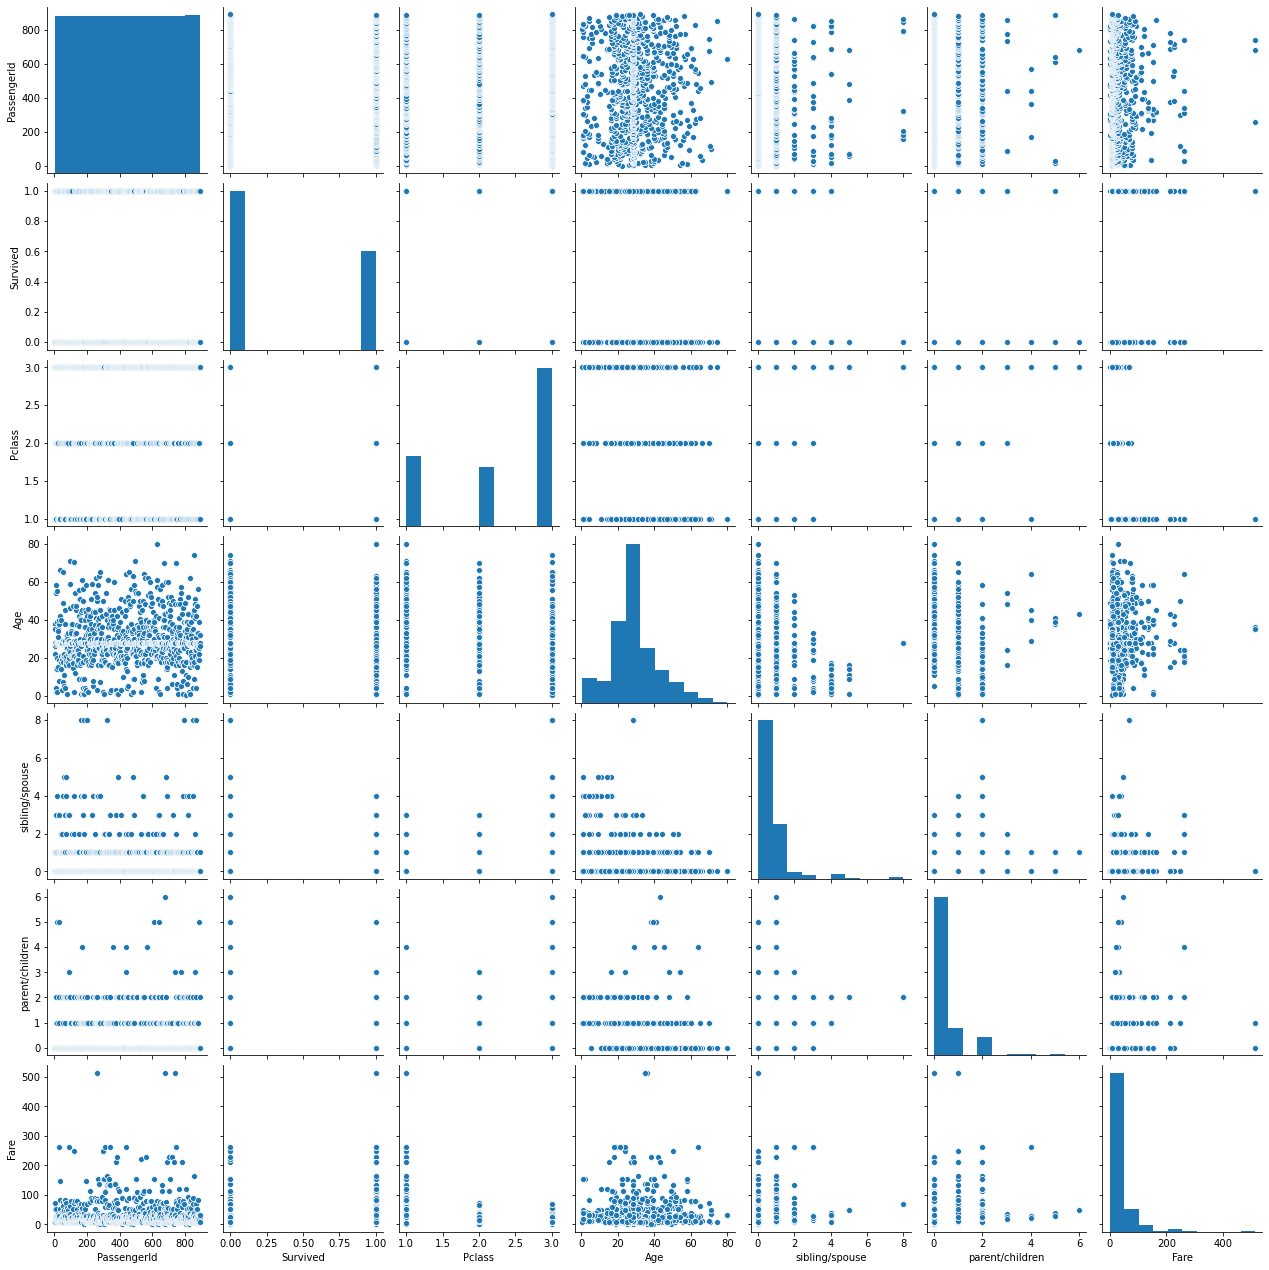

In [149]:
sns.pairplot(df)

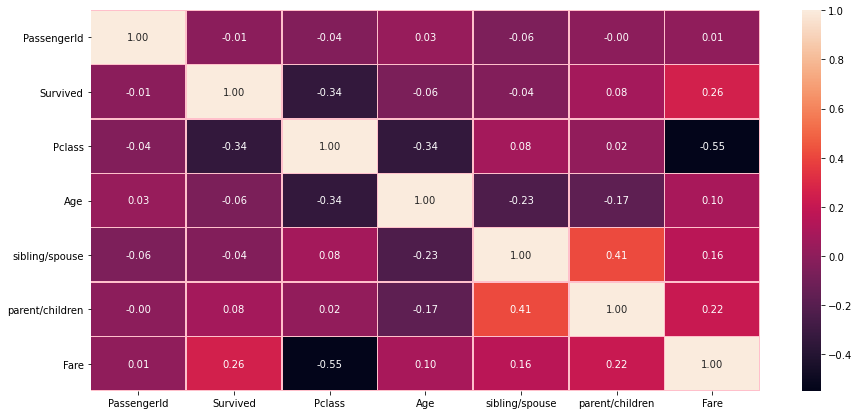

In [150]:
df.corr()

plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True,linewidth=0.5,linecolor="pink",fmt='.2f')

After above analysis it was found that 'Name''Cabin''PassengerId' are not related survival hence dropped
fare is 26% correlated
parent/children =22%
sibling/spouse = 16%

In [151]:
df.describe()

,PassengerId,Survived,Pclass,Age,sibling/spouse,parent/children,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [152]:
#the mean and meadian is widely spread in fare column and others columns are having not much spread/gap

In [153]:
df.head(50)

,PassengerId,Survived,Pclass,Name,Sex,Age,sibling/spouse,parent/children,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,B96 B98,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,B96 B98,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,B96 B98,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,B96 B98,C


In [154]:
df.dtypes

PassengerId          int64
Survived             int64
Pclass               int64
Name                object
Sex                 object
Age                float64
sibling/spouse       int64
parent/children      int64
Ticket              object
Fare               float64
Cabin               object
Embarked            object
dtype: object

In [155]:
df.skew()

PassengerId        0.000000
Survived           0.478523
Pclass            -0.630548
Age                0.510245
sibling/spouse     3.695352
parent/children    2.749117
Fare               4.787317
dtype: float64

From the above observation the columns fall under high skewnwness:
Fare               4.787317
sibling/spouse     3.695352
parent/children    2.749117
pclass             -0.630



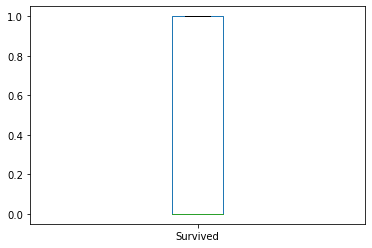

In [156]:
df['Survived'].plot.box()

In [157]:
#no outliers detected

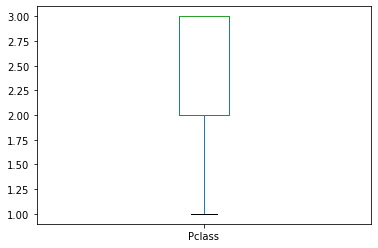

In [158]:
df['Pclass'].plot.box()

In [159]:
#no outliers found

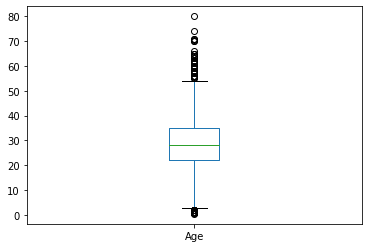

In [160]:
df['Age'].plot.box()

In [161]:
#as found with statistical tools 0.389108 level outliers graphically also outliers are present

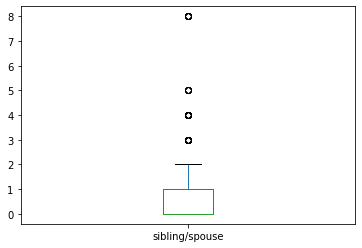

In [162]:
df['sibling/spouse'].plot.box()
     

In [163]:
#3.695352 outliers are represented graphically

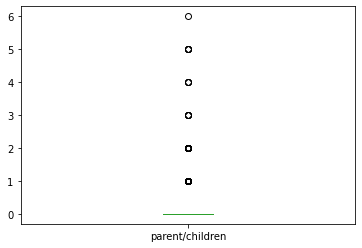

In [164]:
df['parent/children'].plot.box()
    

In [165]:
#we can observe outliers 

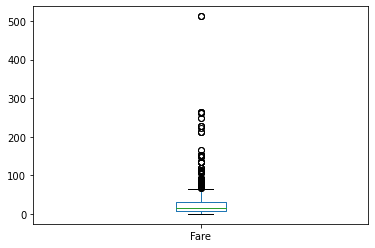

In [166]:
df['Fare'].plot.box()

In [167]:
#as it was highly skewed data it is confirmed with graph too

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023ACC0806D0>,
      dtype=object)

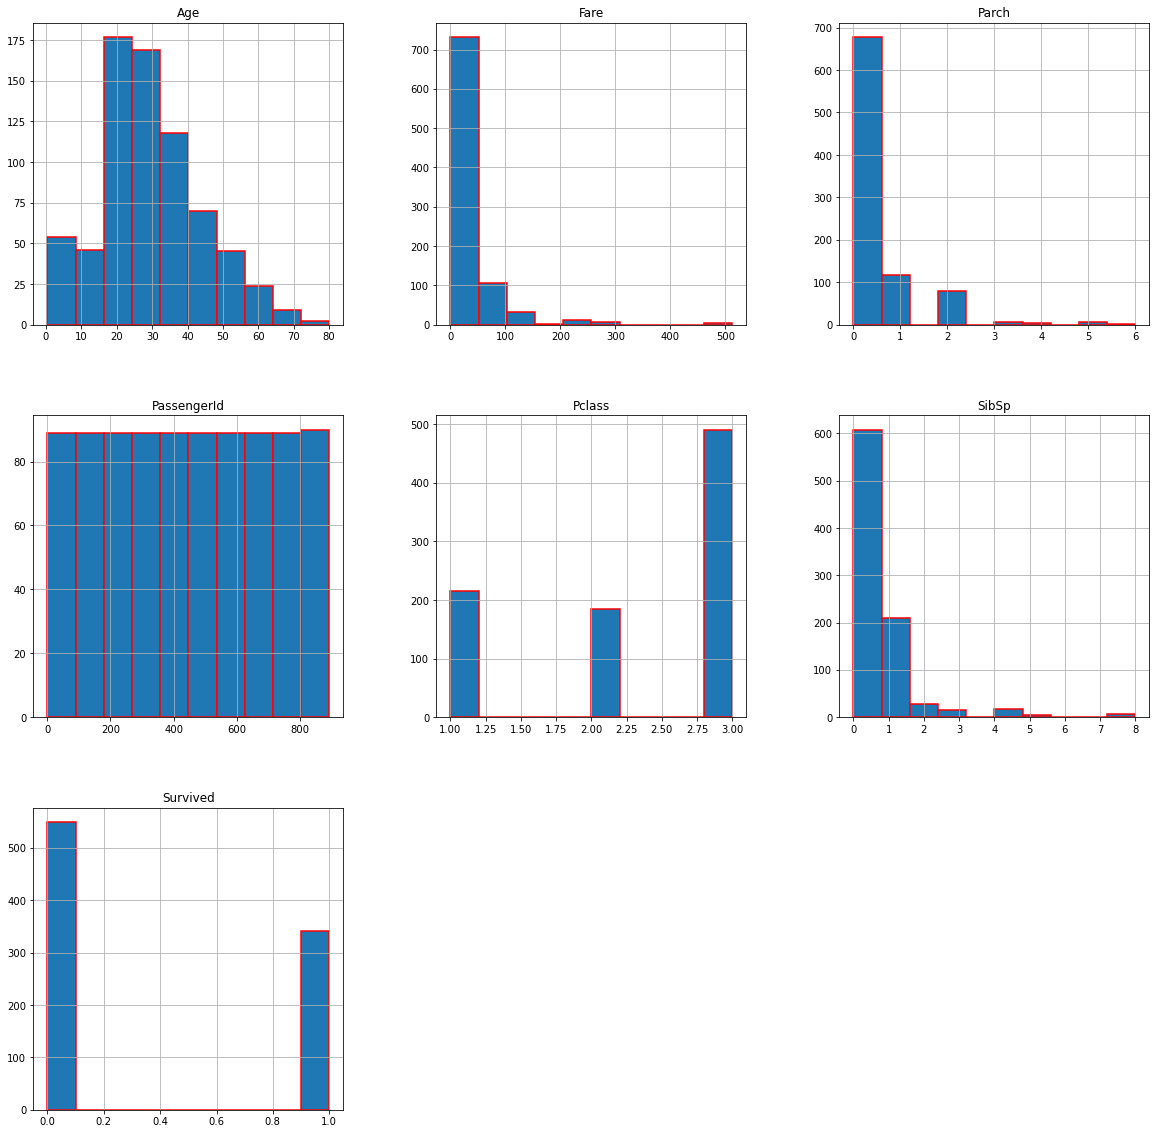

In [168]:
data.hist(edgecolor='red',linewidth=1.5,figsize=(20,20))

In [169]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

le=LabelEncoder()
df['Sex']=le.fit_transform(df['Sex'])
df['Sex']
df['Fare']=le.fit_transform(df['Fare'])
df['Fare']
df['sibling/spouse']=le.fit_transform(df['sibling/spouse'])
df['sibling/spouse']
df['Age']=le.fit_transform(df['Age'])
df['Age']
df['Ticket']=le.fit_transform(df['Ticket'])
df['Ticket']

0      523
1      596
2      669
3       49
4      472
      ... 
886    101
887     14
888    675
889      8
890    466
Name: Ticket, Length: 891, dtype: int32

In [170]:
#data is not evemly distributed

In [171]:
df=df.drop(['Cabin'],axis=1)
df=df.drop(['Embarked'],axis=1)
df=df.drop(['Name'],axis=1)

In [172]:
#as not related to wether passsengers due to these attributes

checking outliers

In [173]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
print(IQR)

PassengerId        445.0
Survived             1.0
Pclass               1.0
Sex                  1.0
Age                 19.0
sibling/spouse       1.0
parent/children      0.0
Ticket             361.0
Fare               116.5
dtype: float64


In [174]:
df_new1=df[~((df<Q1-(1.5*IQR))|(df>(Q3+(1.5*IQR)))).any(axis=1)]

In [175]:
print(df_new1.shape)

(655, 9)


In [176]:
df.shape

(891, 9)

In [177]:
percentage_loss=((891-676)/891)*100
print(percentage_loss)

24.130190796857466


In [178]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([ 13,  16,  25,  50,  59,  68,  71,  86, 119, 159, 164, 167, 171,
        180, 182, 201, 233, 261, 266, 278, 324, 360, 386, 437, 438, 480,
        541, 542, 567, 610, 638, 678, 683, 686, 736, 774, 787, 792, 813,
        824, 846, 850, 858, 863, 885], dtype=int64),
 array([6, 5, 6, 5, 5, 5, 5, 6, 5, 5, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6,
        5, 6, 6, 5, 5, 5, 6, 6, 6, 6, 5, 5, 6, 6, 5, 5, 5, 5, 5, 5, 6, 5,
        6], dtype=int64))

In [179]:
df_new=df[(z<3).all(axis=1)]

In [180]:
df_new

,PassengerId,Survived,Pclass,Sex,Age,sibling/spouse,parent/children,Ticket,Fare
0,1,0,3,1,28,1,0,523,18
1,2,1,1,0,51,1,0,596,207
2,3,1,3,0,34,0,0,669,41
3,4,1,1,0,47,1,0,49,189
4,5,0,3,1,47,0,0,472,43
...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,35,0,0,101,85
887,888,1,1,0,24,0,0,14,153
888,889,0,3,0,36,1,2,675,131
889,890,1,1,1,34,0,0,8,153


In [181]:
df.shape

(891, 9)

In [182]:
percentage_loss=((891-846)/891)*100
print(percentage_loss)

5.05050505050505


In [183]:
#since 5% data will be lost while removing outliers we adopt zscore technique

In [184]:
df_new=df[~((df<Q1-(1.5*IQR))|(df>(Q3+(1.5*IQR)))).any(axis=1)]

In [185]:
print(df_new.shape)

(655, 9)


In [186]:
df.shape

(891, 9)

In [187]:
percentage_loss=((891-691)/801)*100
print(percentage_loss)

24.968789013732835


In [188]:
from sklearn.model_selection import train_test_split
x = df_new.drop("Survived", axis=1)
y = df_new["Survived"]

In [189]:
x.shape

(655, 8)

In [190]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-1.73254386,  0.79405292,  0.63448372, ...,  0.        ,
         0.90995049, -1.04410683],
       [-1.72864518, -1.62503853, -1.57608456, ...,  0.        ,
         1.27469504,  1.7480044 ],
       [-1.7247465 ,  0.79405292, -1.57608456, ...,  0.        ,
         1.63943958, -0.7043261 ],
       ...,
       [ 1.72558576, -1.62503853, -1.57608456, ...,  0.        ,
        -1.63326833,  0.95025833],
       [ 1.73338312, -1.62503853,  0.63448372, ...,  0.        ,
        -1.66324733,  0.95025833],
       [ 1.7372818 ,  0.79405292,  0.63448372, ...,  0.        ,
         0.62514995, -0.86682993]])

In [191]:
y.shape

(655,)

In [192]:
y=le.fit_transform(y)
y

array([0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,

In [193]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

treating outliers

In [194]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

CLASSIFICATION

In [195]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=43)

In [196]:
lr=LogisticRegression()

In [197]:
lr.fit(x_train,y_train)
lr.score(x_train,y_train)
predlr=lr.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.7793103448275862
[[77 12]
 [20 36]]
              precision    recall  f1-score   support

           0       0.79      0.87      0.83        89
           1       0.75      0.64      0.69        56

    accuracy                           0.78       145
   macro avg       0.77      0.75      0.76       145
weighted avg       0.78      0.78      0.78       145



In [198]:
gnb=GaussianNB()

In [199]:
gnb.fit(x_train,y_train)
gnb.score(x_train,y_train)
predgnb=gnb.predict(x_test)
print(accuracy_score(y_test,predgnb))
print(confusion_matrix(y_test,predgnb))
print(classification_report(y_test,predgnb))

0.7724137931034483
[[72 17]
 [16 40]]
              precision    recall  f1-score   support

           0       0.82      0.81      0.81        89
           1       0.70      0.71      0.71        56

    accuracy                           0.77       145
   macro avg       0.76      0.76      0.76       145
weighted avg       0.77      0.77      0.77       145



In [200]:
svc=SVC()

In [201]:
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.7793103448275862
[[77 12]
 [20 36]]
              precision    recall  f1-score   support

           0       0.79      0.87      0.83        89
           1       0.75      0.64      0.69        56

    accuracy                           0.78       145
   macro avg       0.77      0.75      0.76       145
weighted avg       0.78      0.78      0.78       145



In [202]:
svc=SVC(kernel='rbf')
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.7793103448275862
[[77 12]
 [20 36]]
              precision    recall  f1-score   support

           0       0.79      0.87      0.83        89
           1       0.75      0.64      0.69        56

    accuracy                           0.78       145
   macro avg       0.77      0.75      0.76       145
weighted avg       0.78      0.78      0.78       145



In [203]:
dt=DecisionTreeClassifier()

In [204]:
dt.fit(x_train,y_train)
dt.score(x_train,y_train)
preddt=dt.predict(x_test)
print(accuracy_score(y_test,preddt))
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

0.7034482758620689
[[64 25]
 [18 38]]
              precision    recall  f1-score   support

           0       0.78      0.72      0.75        89
           1       0.60      0.68      0.64        56

    accuracy                           0.70       145
   macro avg       0.69      0.70      0.69       145
weighted avg       0.71      0.70      0.71       145



In [205]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [206]:
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
predknn=knn.predict(x_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

0.7517241379310344
[[75 14]
 [22 34]]
              precision    recall  f1-score   support

           0       0.77      0.84      0.81        89
           1       0.71      0.61      0.65        56

    accuracy                           0.75       145
   macro avg       0.74      0.72      0.73       145
weighted avg       0.75      0.75      0.75       145



lr and svc is the best classifiers

Regularisation

In [207]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
from sklearn.metrics import r2_score

In [208]:
max_scr=0
for i in range (0,500):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=.20) 
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(r2_score(y_train,pred_train)*100,2)==round(r2_score(y_test,pred_test)*100,2):
        print("At random state:- ",i,"The model performs very well")
        print("At random_state:-",i)
        print("Training r2_score is :-",r2_score(y_train,pred_train)*100)
        print("tESTING R2_SCORE IS :-",r2_score(y_test,pred_test)*100)

In [209]:
x_train,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.20)

ValueError: too many values to unpack (expected 3)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

Lasso

In [ ]:
from sklearn.linear_model import Lasso

parameters={'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf= GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

In [ ]:
ls=Lasso(alpha=0.01,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)

lss=r2_score(y_test,pred_ls)
for j in range (10,100):
    lsscore=cross_val_score(ls,x,y,cv=j)
    lsc=lsscore.mean()
    print("At cv:-",j)
    print("Cross validation score is :-",lsc*100)
    print("R2_score is:-",lss*100)
    print("\n")

In [223]:
print ("at cv :-",11)
print("at cross validation score is :-",37.7463)
print("r2_score:-",43.1720)

at cv :- 11
at cross validation score is :- 37.7463
r2_score:- 43.172


In [224]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import numpy as np

In [225]:
print('Error:-')
print('MeanAbsoluteError:',mean_absolute_error(y_test,pred_ls))
print('MeanSquaredError:',mean_squared_error(y_test,pred_ls))
print('RootMeanSquareError:',np.sqrt(mean_squared_error(y_test,pred_ls)))

Error:-
MeanAbsoluteError: 0.26061342816906224
MeanSquaredError: 0.12378225200509095
RootMeanSquareError: 0.35182702000427846


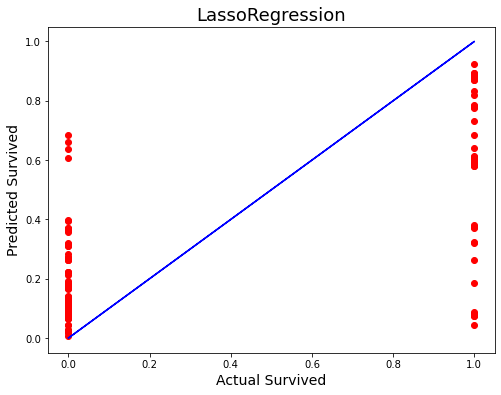

In [226]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_ls,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual Survived",fontsize=14)
plt.ylabel("Predicted Survived",fontsize=14)
plt.title("LassoRegression",fontsize=18)
plt.show()

Ridge Regression

In [227]:
from sklearn.linear_model import Ridge

parameters={'alpha': [.0001,.001,.01,.1,1],'fit_intercept':[True,False],'copy_x':[True,False],'tol':[.0001,.001,.01,.1,1]}
rd=Ridge()
clf=GridSearchCV(rd,parameters)
clf.fit(x_train,y_train)
           
print(clf.best_params_)

ValueError: Invalid parameter copy_x for estimator Ridge(alpha=0.0001). Check the list of available parameters with `estimator.get_params().keys()`.

logisticregression

In [211]:
pred_lr = lr.predict(x_test)
from sklearn.model_selection import cross_val_score
lss = accuracy_score(y_test,pred_lr)
for j in range (2,10):
    lsscore =cross_val_score(lr,x,y,cv=j)
    lsc = lsscore.mean()
    print("At cv:-",j)
    print("Cross validation score is:-",lsc*100)
    print("accuracy_score is :-",lsc*100)
    print("\n")


At cv:- 2
Cross validation score is:- 77.71406727828747
accuracy_score is :- 77.71406727828747


At cv:- 3
Cross validation score is:- 80.91966542387556
accuracy_score is :- 80.91966542387556


At cv:- 4
Cross validation score is:- 81.52588657788418
accuracy_score is :- 81.52588657788418


At cv:- 5
Cross validation score is:- 81.3740458015267
accuracy_score is :- 81.3740458015267


At cv:- 6
Cross validation score is:- 81.68056713928273
accuracy_score is :- 81.68056713928273


At cv:- 7
Cross validation score is:- 81.67630813478446
accuracy_score is :- 81.67630813478446


At cv:- 8
Cross validation score is:- 81.83529057512797
accuracy_score is :- 81.83529057512797


At cv:- 9
Cross validation score is:- 81.67808219178082
accuracy_score is :- 81.67808219178082




In [228]:
print('Error:-')
print('MeanAbsoluteError:',mean_absolute_error(y_test,pred_lr))
print('MeanSquaredError:',mean_squared_error(y_test,pred_lr))
print('RootMeanSquareError:',np.sqrt(mean_squared_error(y_test,pred_lr)))

Error:-
MeanAbsoluteError: 0.13740458015267176
MeanSquaredError: 0.13740458015267176
RootMeanSquareError: 0.37068123792912927


In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_ls,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual Survived",fontsize=14)
plt.ylabel("Predicted Survived",fontsize=14)
plt.title("LogisticRegression",fontsize=18)
plt.show()

DecisionTreeRegressor

In [229]:
from sklearn.tree import DecisionTreeRegressor

parameters={'criterion':['mse','friedman_mse','mac'],'splitter':['best','random']}
dt=DecisionTreeRegressor()
clf=GridSearchCV(dt,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'criterion': 'friedman_mse', 'splitter': 'random'}


In [234]:
dt=DecisionTreeRegressor(criterion='mse',splitter='random')
dt.fit(x_train,y_train)
dt.score(x_train,y_train)
pred_decision=dt.predict(x_test)

dts=r2_score(y_test,pred_decision)
print('R2 Score:',dts*100)

dtscore=cross_val_score(dt,x,y,cv=8)
dtc=dtscore.mean()
print('cross val score:',dtc*100)

R2 Score: -33.17281968967363
cross val score: -10.457846224565124


In [235]:
print('Error:-')
print('MeanAbsoluteError:',mean_absolute_error(y_test,pred_decision))
print('MeanSquaredError:',mean_squared_error(y_test,pred_decision))
print('RootMeanSquareError:',np.sqrt(mean_squared_error(y_test,pred_decision)))

Error:-
MeanAbsoluteError: 0.2900763358778626
MeanSquaredError: 0.2900763358778626
RootMeanSquareError: 0.5385873521332102


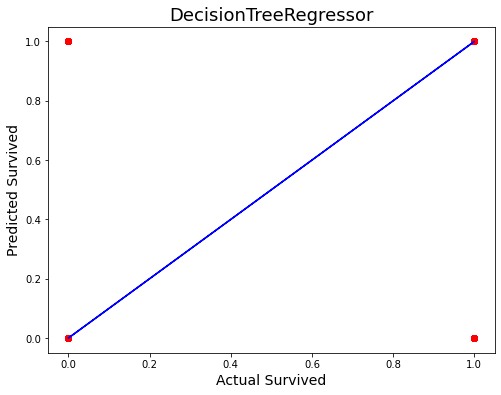

In [236]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_decision,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual Survived",fontsize=14)
plt.ylabel("Predicted Survived",fontsize=14)
plt.title("DecisionTreeRegressor",fontsize=18)
plt.show()

In [237]:
from sklearn.ensemble import RandomForestRegressor

parameters={'criterion':['friedman_mse','mae'],'n_estimators':[100,200,300]}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)
                         
print(clf.best_params_)
                        

{'criterion': 'friedman_mse', 'n_estimators': 300}


In [239]:
rf=RandomForestRegressor(criterion='friedman_mse',n_estimators=300)
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_random=rf.predict(x_test)

rfs=r2_score(y_test,pred_random)
print('R2 Score:',rfs*100)

rfscore=cross_val_score(rf,x,y,cv=8)
rfc=rfscore.mean()
print('cross val score:',rfc*100)

R2 Score: 47.21411033826763
cross val score: 36.0930147419291


In [240]:
print('Error:-')
print('MeanAbsoluteError:',mean_absolute_error(y_test,pred_random))
print('MeanSquaredError:',mean_squared_error(y_test,pred_random))
print('RootMeanSquareError:',np.sqrt(mean_squared_error(y_test,pred_random)))

Error:-
MeanAbsoluteError: 0.23419847328244275
MeanSquaredError: 0.11497794741306192
RootMeanSquareError: 0.3390839828317786


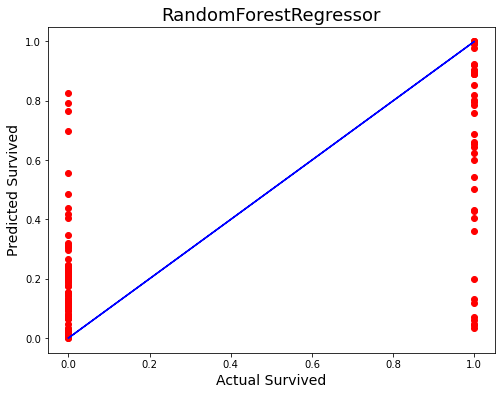

In [214]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_random,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual Survived",fontsize=14)
plt.ylabel("Predicted Survived",fontsize=14)
plt.title("RandomForestRegressor",fontsize=18)
plt.show()

GradientBoostingRegressor

In [215]:
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
parameters={'loss':['ls','lad','huber','quantile'],'n_estimators':[50,100,200],'criterion':['friedman_mse','mse']}
gbr=GradientBoostingRegressor()
clf=GridSearchCV(gbr,parameters)
clf.fit(x_train,y_train)
                         
print(clf.best_params_)

{'criterion': 'mse', 'loss': 'ls', 'n_estimators': 50}


In [241]:
gbr=GradientBoostingRegressor(criterion='mse',loss='ls',n_estimators=50)
gbr.fit(x_train,y_train)
gbr.score(x_train,y_train)
pred_gbr=gbr.predict(x_test)

gbrs=r2_score(y_test,pred_random)
print('R2 SCORE',gbrs*100)

gbscore=cross_val_score(gbr,x,y,cv=8)
gbrc=gbscore.mean()
print('CrossValScore:',gbrc*100)

R2 SCORE 47.21411033826763
CrossValScore: 36.72484197381809


In [242]:
print('Error:-')
print('MeanAbsoluteError:',mean_absolute_error(y_test,pred_gbr))
print('MeanSquaredError:',mean_squared_error(y_test,pred_gbr))
print('RootMeanSquareError:',np.sqrt(mean_squared_error(y_test,pred_gbr)))

Error:-
MeanAbsoluteError: 0.24197082669320572
MeanSquaredError: 0.11430225023220764
RootMeanSquareError: 0.3380861580014888


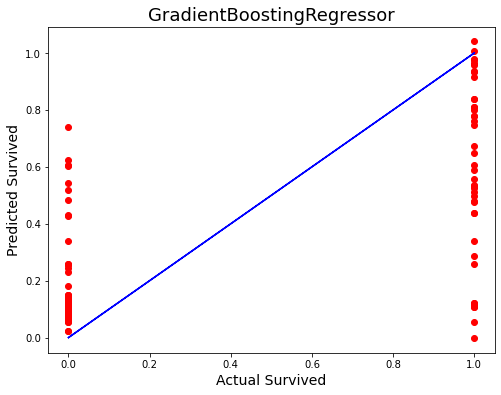

In [243]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_gbr,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual Survived",fontsize=14)
plt.ylabel("Predicted Survived",fontsize=14)
plt.title("GradientBoostingRegressor",fontsize=18)
plt.show()

In [220]:
from sklearn.svm import SVR

parameters={'kernel':['linear','poly','rbf','sigmoid']}
sv=SVR()
clf=GridSearchCV(sv,parameters)
clf.fit(x_train,y_train)

print('clf.best_params_')


clf.best_params_


In [244]:
#The best model according to cross validation and r2 score is Logistic Regression

In [245]:
import pickle
filename='PROJECT1_TITANIC'
pickle.dump(lr,open(filename,'wb'))

CONCLUSION

In [248]:
import numpy as np
a=np.array(y_test)
predicted=np.array(lr.predict(x_test))

In [249]:
df=pd.DataFrame({"original":a,"predict":predicted},index=range(len(a)))

In [251]:
df

,original,predict
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
126,0,1
127,0,0
128,0,0
129,0,0


#from the above table the modelis predicted with 81% accuracy